<p><b>Mnist-fashion</b> dataset</p> 

In [1]:
from sklearn.datasets import fetch_openml
fashion_mnist=fetch_openml(data_id=40996,as_frame=True)

In [2]:
type(fashion_mnist)

sklearn.utils.Bunch

In [3]:
import pandas as pd
df=pd.DataFrame(
    fashion_mnist.data,
    columns=fashion_mnist.feature_names
)

In [4]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(70000, 784)

In [6]:
df['target']=fashion_mnist.target

In [7]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
labels_s = '0 T-shirt/top \n1 Trouser \n2 Pullover \n3 Dress \n4 Coat \n5 Sandal \n6 Shirt \n7 Sneaker \n8 Bag \n9 Ankle boot'
fashion_label_translation = {int(k): v for k, v in [item.split(maxsplit=1) for item in labels_s.split('\n')]}
def translate_label(y, translation=fashion_label_translation):
    return pd.Series(y).apply(lambda y: translation[int(y)]).values

In [9]:
def display_fashion(img, target, ax):
    if len(img.shape):
        w = int(np.sqrt(img.shape[0]))
        img = img.reshape((w, w))
    ax.imshow(img, cmap='Greys')
    ax.set_title(f'{target}')
    ax.grid(False)

start

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
fashion_mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
fashion_mnist['data'].shape

(70000, 784)

<b>using train_test_split to take 10000 sample</b>

In [13]:
fashion_mnist_sample={}

In [14]:
fashion_mnist_sample['data'], a, fashion_mnist_sample['target'], b=train_test_split(fashion_mnist['data'],fashion_mnist['target'], train_size=10000)

In [15]:
a.shape

(60000, 784)

In [16]:
b.shape

(60000,)

<b>using train_test_split to split 10000 data into train & test</b>

In [17]:
x,y=fashion_mnist_sample['data'],fashion_mnist_sample['target']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
y_train

42153    1
24325    5
60622    6
2277     8
28223    2
        ..
68613    8
46486    6
60714    0
30093    4
9832     3
Name: class, Length: 8000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

<b>preprocessing</b>

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

<b>numerical labels -> string</b><i> [no need]</i>

In [30]:
translation=fashion_label_translation

In [31]:
y_train_translated= translate_label(y_train,translation=translation)
y_test_translated=translate_label(y_test,translation=translation)

<b>string -> numerical</b> <i>[no need]</i>

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train_encoded=le.fit_transform(y_train_translated)
y_test_encoded=le.transform(y_test_translated)

<b>view image</b>

In [23]:
import matplotlib.pyplot as plt
import random
import numpy as np

<ipython-input-24-7e077c1b66f0>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs.show()


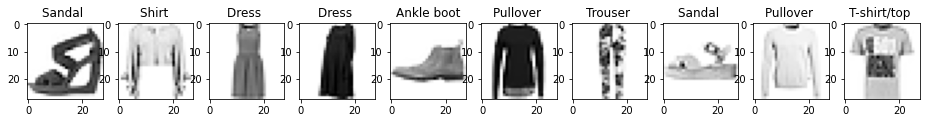

In [24]:
figs,axs=plt.subplots(1,10,figsize=(16,12))
for i in range(10):
    rand=random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand],y_train_translated[rand],axs[i])
figs.show()

<p><b>hyperparameter effects</b></p>
<i>default learning_rate_init: 0.0001 & learning_rate=constant</i>

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
clf=MLPClassifier(hidden_layer_sizes=(100,100),max_iter=500)
clf.fit(x_train,y_train_encoded)
# y_test_pred=clf.predict(x_test)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500)

<AxesSubplot:title={'center':'loss_curve stopped after 104 epochs'}>

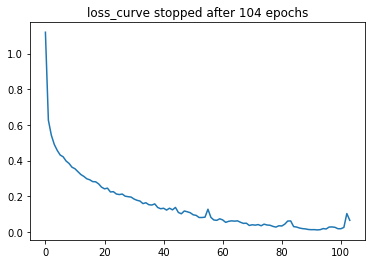

In [27]:
pd.Series(clf.loss_curve_).plot(
    title=f'loss_curve stopped after {clf.n_iter_} epochs'
)

In [28]:
y_test_pred=clf.predict(x_test)

In [29]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [30]:
type(y_test.iloc[0])

str

In [31]:
f1_score(y_test.astype(int),y_test_pred,average='micro')

0.344

In [32]:
precision_score(y_test.astype(int),y_test_pred,average='micro')

0.344

In [33]:
recall_score(y_test.astype(int),y_test_pred,average='micro')

0.344

<p><b>using different hyperparameters</b></p>
<i>finding optimum learning rate, solver=stochastic gradient descent</i>

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
learning_rate_init_options=[1,0.1,0.01,0.001]

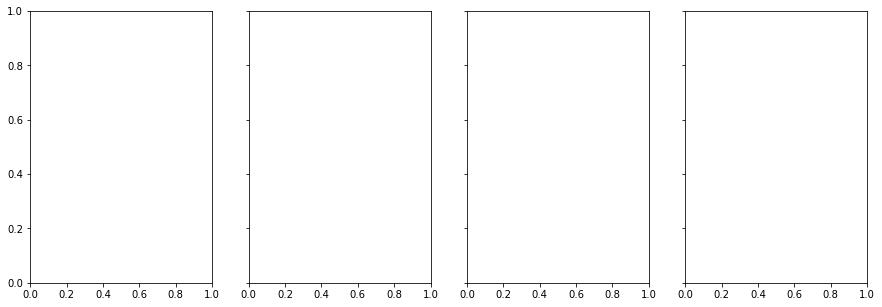

In [37]:
fig,axs=plt.subplots(1,len(learning_rate_init_options),figsize=(15,5),sharex=True,sharey=True)

In [38]:
type(y_train_encoded[0])

numpy.int64

In [39]:
type(y_train.iloc[0])

str

1 

/home/mahmud/anaconda3/envs/computer-vision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1 

/home/mahmud/anaconda3/envs/computer-vision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


0.01 

/home/mahmud/anaconda3/envs/computer-vision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


0.001 

/home/mahmud/anaconda3/envs/computer-vision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-40-73a85b0b532a>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


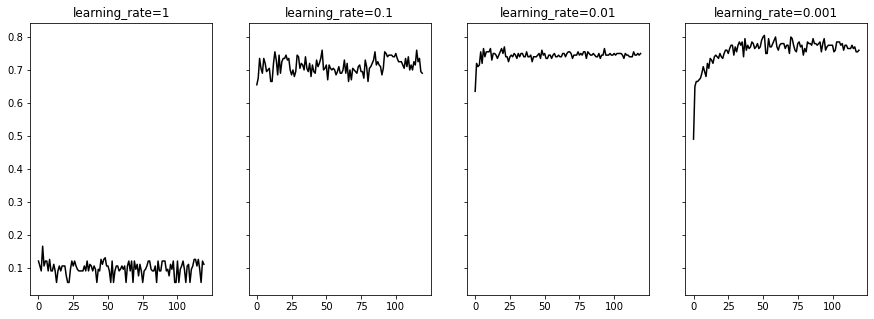

In [40]:
fig,axs=plt.subplots(1,len(learning_rate_init_options),figsize=(15,5),sharex=True,sharey=True)
for i,learning_rate_init in enumerate(learning_rate_init_options):
    print(f'{learning_rate_init} ', end='')
    clf=MLPClassifier(
        solver='sgd',
        learning_rate='constant',
        learning_rate_init=learning_rate_init,
        hidden_layer_sizes=(500,),
        validation_fraction=0.2,
        early_stopping=True,
        n_iter_no_change=120,
        max_iter=120,
        batch_size=25,
        verbose=0
    )
    clf.fit(x_train[:1000,:],y_train[:1000])
    pd.Series(clf.validation_scores_).plot(
        title=f'learning_rate={learning_rate_init}',
        kind='line',
        color='k',
        ax=axs[i]
    )
fig.show()

<p style="color:blue;"><b>learned from this graph:</b> <p>using only 1000 data to select optimum learning_rate</p></p>

<p style="color:white"><b>selecting batch_size</b></p><p>using 1500 samples</p>
<i>early_stoping used unlike book</i>

In [58]:
from sklearn.neural_network import MLPClassifier
%matplotlib inline
import matplotlib.pyplot as plt

In [59]:
batch_sizes=[1,10,100,1500]

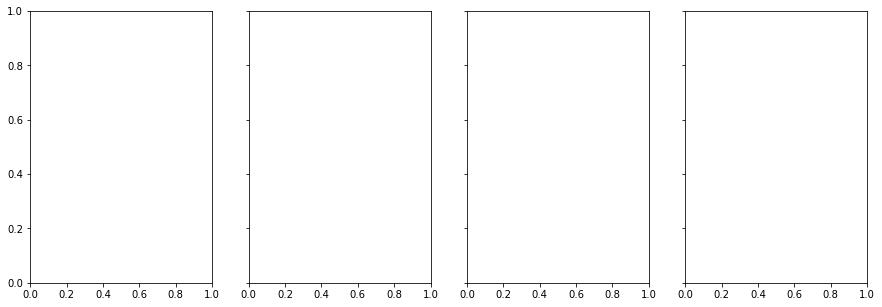

In [60]:
fig,axs=plt.subplots(1,len(batch_sizes),figsize=(15,5),sharex=True,sharey=True)

1 Iteration 1, loss = 1.51483174
Validation score: 0.693333
Iteration 2, loss = 0.95429656
Validation score: 0.720000
Iteration 3, loss = 0.81623137
Validation score: 0.766667
Iteration 4, loss = 0.74442054
Validation score: 0.813333
Iteration 5, loss = 0.69318450
Validation score: 0.793333
Iteration 6, loss = 0.64636542
Validation score: 0.800000
Iteration 7, loss = 0.61765571
Validation score: 0.800000
Iteration 8, loss = 0.59075318
Validation score: 0.780000
Iteration 9, loss = 0.56309307
Validation score: 0.806667
Iteration 10, loss = 0.55298524
Validation score: 0.820000
Iteration 11, loss = 0.53504539
Validation score: 0.820000
Iteration 12, loss = 0.51781817
Validation score: 0.813333
Iteration 13, loss = 0.50105774
Validation score: 0.826667
Iteration 14, loss = 0.48575643
Validation score: 0.800000
Iteration 15, loss = 0.47808934
Validation score: 0.753333
Iteration 16, loss = 0.46880595
Validation score: 0.826667
Iteration 17, loss = 0.45507450
Validation score: 0.833333
Iter

<ipython-input-63-36d55343b5ef>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


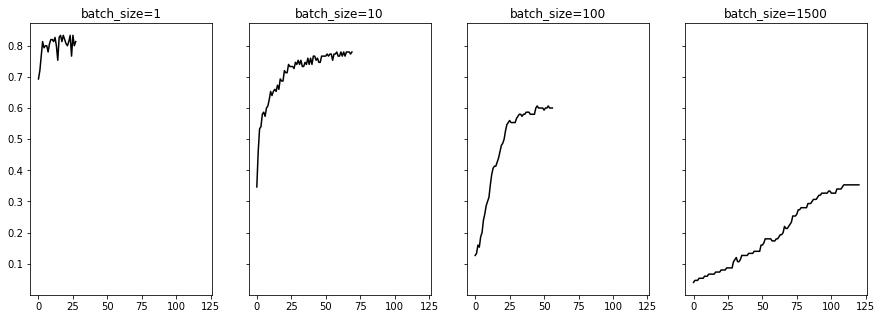

In [63]:
# stochastic gradient descent using no momentum
fig,axs=plt.subplots(1,len(batch_sizes),figsize=(15,5),sharex=True,sharey=True)
for i, batch_size in enumerate(batch_sizes):
    print(f'{batch_size} ',end= '')
    clf=MLPClassifier(
        hidden_layer_sizes=(500,),
        learning_rate='constant',
        learning_rate_init=0.001,
        momentum=0,
        max_iter=250,
        solver='sgd',
        early_stopping=True,
        batch_size=batch_size,
        verbose=1
    )
    clf.fit(x_train[:1500,:],y_train[:1500])
    pd.Series(clf.validation_scores_).plot(
        title=f'batch_size={batch_size}',
        color='k',
        kind='line',
        ax=axs[i]
    )
fig.show()

<p style="color:yellow">learned:</p>
<p>mini batch size not only popular for memory constraints but also for better learning</p>

<b>need more training samples?</b>

In [32]:
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier

In [33]:
train_sizes=[1,0.75,0.5,0.25,0.1,0.05]

In [47]:
train_sizes,train_scores,test_scores=learning_curve(
    MLPClassifier(
        hidden_layer_sizes=(100,100),
        solver='adam',
        early_stopping=False
    ),
    x_train,y_train_encoded,
    train_sizes=train_sizes,
    scoring="precision_macro",
    cv=3,
    verbose=2,
    n_jobs=-1
)


[learning_curve] Training set sizes: [ 266  533 1333 2666 3999 5333]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  1.1min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.4min finished


<p># cv->cross-validation = 3</p>
<p># 8000*0.05=400</p>
<p># 400/3=133.33=134</p>
<p># 400-134=266 -> number of training samples while using 0.05% data</p>

In [48]:
x_train.shape

(8000, 784)

In [49]:
df_learning_curve=pd.DataFrame(
    {'train size' : train_sizes,
    'train_score':train_scores.mean(axis=1),
    'test_score':test_scores.mean(axis=1)}
)

In [53]:
df_learning_curve.head(n=6)

,train_score,test_score
train_sizes,,
266,1.000000,0.756197
533,1.000000,0.800220
1333,1.000000,0.815909
2666,1.000000,0.833162
3999,0.997436,0.842505
5333,0.998679,0.853416


In [57]:
df_learning_curve=pd.DataFrame(
    {'train_sizes' : train_sizes,
    'train_scores':train_scores.mean(axis=1),
    'test_scores':test_scores.mean(axis=1)}
).set_index('train_sizes')
df_learning_curve.head(n=6)

,train_scores,test_scores
train_sizes,,
266,1.000000,0.756197
533,1.000000,0.800220
1333,1.000000,0.815909
2666,1.000000,0.833162
3999,0.997436,0.842505
5333,0.998679,0.853416


<AxesSubplot:title={'center':'Learning curves'}, xlabel='train_sizes'>

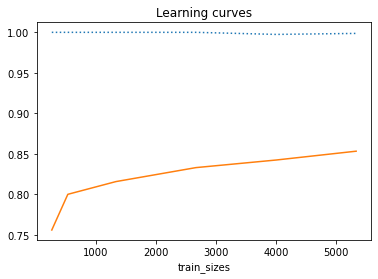

In [61]:
df_learning_curve['train_scores'].plot(
    title='Learning curves',ls=':'
)
df_learning_curve['test_scores'].plot(
    title='Learning curves',ls='-'
)

<p>plotted against index of the dataframe</p>

<p style='color:yellow'><b>learned:</b></p>
<p>in this case we should take the whole 8000 sample as training because the curve didn't flat unlike book. look at 199 page</p>

<b>we should take the subsets of data only to tune hyperparameters like- learning rate, batch_size etc. after we have learnt these, we should work with the entire data set</b>

<p style='color:red'><b>important:</b></p>
<ul>
    <li>learning curve is used to determine sample size</li>
    <li>validation curve is used to determine batch_size,learning rate, epochs</li>
</ul>

<p><b>need more epochs?</b></p>

In [62]:
from sklearn.model_selection import validation_curve

In [66]:
max_iter_range=[5,10,25,50,75,100,150]

In [72]:
train_scores,test_scores=validation_curve(
    MLPClassifier(
        hidden_layer_sizes=(100, 100),
        solver='adam',
        early_stopping=False
    ),
    x_train, y_train_encoded,
    param_name="max_iter", param_range=max_iter_range,
    scoring="precision_macro",
    cv=3,
    verbose=2,
    n_jobs=-1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  21 | elapsed:  1.2min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  2.2min finished


In [75]:
df_epochs=pd.DataFrame({
    'iteration':max_iter_range,
    'train score':train_scores.mean(axis=1),
    'test score':test_scores.mean(axis=1)
}).set_index('iteration')

<AxesSubplot:title={'center':'validation curves'}, xlabel='iteration'>

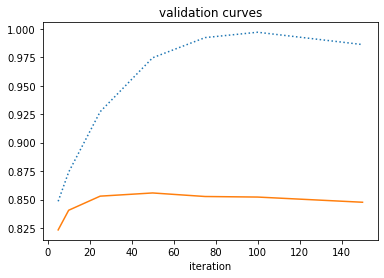

In [78]:
df_epochs['train score'].plot(
    title='validation curves',
    ls=':'
)
df_epochs['test score'].plot(
    title='validation curves',
    ls='-'
)

<p style='color:yellow'><b>learned:</b></p>
<ul>
    <li>test score stopped improving after around 21 epochs. in this case 21 epochs are enough</li>
    <li>in books there is an example of overfitting. page- 201</li>
</ul>

<p><b>using gridsearchCV and randomizedsearchCV to determine the size of the network</b></p>

In [34]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid={
    'hidden_layer_sizes':[(50,), (50, 50), (100, 50), (100, 100), (500,100), (500, 100, 100)],
    'learning_rate_init':[0.01,0.001],
    'activation':['logistic','relu','tanh'],
    'solver':['sgd','adam']
}

In [37]:
gs=GridSearchCV(
    estimator=MLPClassifier(
        max_iter=50,
        batch_size=50,
        early_stopping=True
    ),
    param_grid=param_grid,
    cv=4,
    verbose=2,
    n_jobs=-1
)
gs.fit(x_train[:2500,:],y_train_encoded[:2500])

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 25.3min finished


GridSearchCV(cv=4,
             estimator=MLPClassifier(batch_size=50, early_stopping=True,
                                     max_iter=50),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (50, 50), (100, 50),
                                                (100, 100), (500, 100),
                                                (500, 100, 100)],
                         'learning_rate_init': [0.01, 0.001],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [40]:
gs.cv_results_

{'mean_fit_time': array([ 5.22167981,  4.37273568,  6.68305242,  6.09695774,  7.97862422,
         4.75412536,  2.49494588,  8.65614074, 13.33954895,  9.74682564,
         4.16992217, 15.40047312, 14.68840086,  9.15873098,  6.45574653,
        15.05685741, 68.46959221, 41.77006662, 34.02769321, 57.19703186,
        35.11984158, 61.02991647, 18.26486486, 65.49984199,  4.42953289,
         4.25514042,  7.23353386,  4.47754449,  2.91167313,  4.6051715 ,
         7.45805734,  5.26146561,  6.42084181, 10.41950125, 13.19683218,
         8.36379212,  6.6193375 , 11.33065528, 14.00732708, 10.53064299,
        43.54272157, 50.05388939, 63.28508294, 38.62887496, 42.51943064,
        57.55522758, 67.99287653, 37.75608277,  5.3299132 ,  3.94218642,
         6.57763076,  4.84907955,  3.9795903 ,  3.3518886 ,  6.25730348,
         4.8658042 ,  5.73324895,  9.64856011, 13.57113445,  9.77188492,
         7.65046239,  8.32150996, 11.49278319,  7.15096837, 39.83872741,
        38.27727246, 56.86825687, 

In [42]:
gs.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (500, 100),
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [43]:
gs.best_score_

0.8196

In [44]:
gs.best_estimator_

MLPClassifier(activation='tanh', batch_size=50, early_stopping=True,
              hidden_layer_sizes=(500, 100), max_iter=50)

<b>Convolution</b>

In [19]:
import numpy as np
x_example =np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,1,0],
    [0,0,1,1,0],
    [0,0,0,0,0]
])

In [20]:
from scipy import ndimage

In [6]:
kernel=[[1,1,1],[1,1,1],[1,1,1]]

In [7]:
x_example_convolve=ndimage.convolve(x_example,kernel,mode='constant',cval=0)
x_example_convolve=x_example_convolve/9

In [9]:
import matplotlib.pyplot as plt

In [16]:
x_example_convolve

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.11111111, 0.22222222, 0.22222222, 0.11111111],
       [0.        , 0.22222222, 0.44444444, 0.44444444, 0.22222222],
       [0.        , 0.22222222, 0.44444444, 0.44444444, 0.22222222],
       [0.        , 0.11111111, 0.22222222, 0.22222222, 0.11111111]])

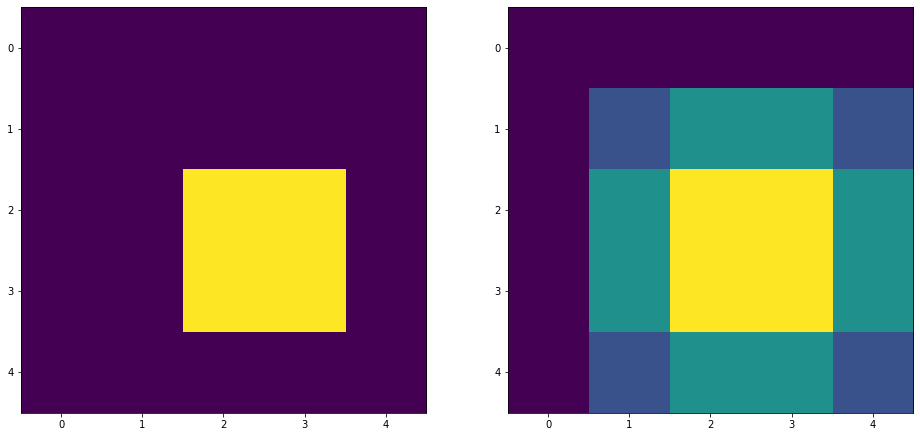

In [15]:
fig,axs=plt.subplots(1,2,figsize=(16,12))
axs[0].imshow(x_example)
axs[1].imshow(x_example_convolve)

<p><b>Feature extraction using convolution</b></p>

In [42]:
from scipy import ndimage
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [50]:
def convolve(x, kernel=[[1,1,1],[1,1,1],[1,1,1]]):
    w=int(np.sqrt(x.shape[1]))
    #print(w)
    x=ndimage.convolve(
      np.array(x).reshape((x.shape[0],w,w)),[kernel],
      mode='constant',cval=0.0
        )
    x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
    return MinMaxScaler().fit_transform(x)

In [44]:
x_train.shape

(8000, 784)

<p style="color:yellow"><b>sharpen kernel</b></p>

In [54]:
sharpen_kernel = [[0,-1,0], [-1,5,-1], [0,-1,0]]
x_train_conv = convolve(x_train, sharpen_kernel)
x_test_conv = convolve(x_test, sharpen_kernel)

In [55]:
x_train_conv.shape

(8000, 784)

<ipython-input-56-7267fa2c5537>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs.show()


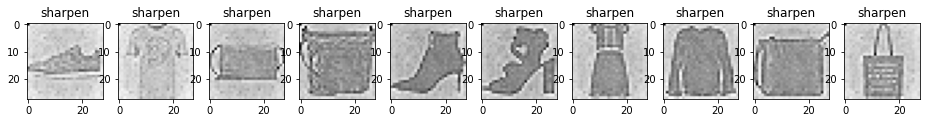

In [56]:
figs,axs=plt.subplots(1,10,figsize=(16,12))
for i in range(10):
    rand=random.choice(range(x_train.shape[0]))
    display_fashion(x_train_conv[rand],"sharpen",axs[i])
figs.show()

<p>1D image to 2D image</p>

In [26]:
w=int(np.sqrt(x_train.shape[1]))
p=np.array(x).reshape((x.shape[0],w,w))

In [27]:
p.shape

(10000, 28, 28)

In [28]:
type(p)

numpy.ndarray

<p style="color:yellow"><b>v-edge</b></p>

In [97]:
x_train.shape

(8000, 784)

In [98]:
v_edge=[[-1,0,1],[-2,0,2],[-1,0,1]]

In [99]:
def convolve(x,kernel=[[1,1,1],[1,1,1],[1,1,1]]):
    w=int(np.sqrt(x.shape[1]))
    #let's convert the image into 2d and then convolve
    x=ndimage.convolve(
        np.array(x).reshape((x.shape[0],w,w)),[kernel],
        mode='constant',cval=0.0
    )
    #converting back to 1D image
    x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
    return MinMaxScaler().fit_transform(x)

In [100]:
x_train_conv=convolve(x_train,v_edge)
x_test_conv=convolve(x_test,v_edge)

In [101]:
def display_fashion(img, target, ax):
    #reshape to 2D and display
    if len(img.shape):
        w = int(np.sqrt(img.shape[0]))
        img = img.reshape((w, w))
    ax.imshow(img, cmap='Greys')
    ax.set_title(f'{target}')
    ax.grid(False)

<ipython-input-102-845290974b2f>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs.show()


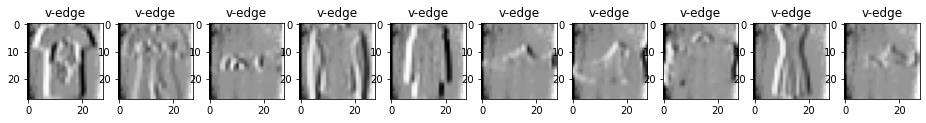

In [102]:
import random
figs,axs=plt.subplots(1,10,figsize=(16,12))
for i in range(10):
    rand=random.choice(range(x_train.shape[0]))
    x=display_fashion(x_train_conv[rand],"v-edge",axs[i])
figs.show()

<p style="color:yellow"><b>h-edge</b></p>

In [118]:
h_edge=[[-1,-2,-1],[0,0,0],[1,2,1]]

In [132]:
def convolve(x,kernel=[[1,1,1],[1,1,1],[1,1,1]]):
    w=int(np.sqrt(x.shape[1]))
    #let's convert the image into 2d and then convolve
    x=ndimage.convolve(
        np.array(x).reshape((x.shape[0],w,w)),[kernel],
        mode='constant',cval=0.0
    )
    #converting back to 1D image
    x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
    return MinMaxScaler().fit_transform(x)

In [136]:
def display_fashion(img, target, ax):
    #reshape to 2D and display
    if len(img.shape):
        w = int(np.sqrt(img.shape[0]))
        img = img.reshape((w, w))
    ax.imshow(img, cmap='Greys')
    ax.set_title(f'{target}')
    ax.grid(False)

In [137]:
x_train_conv=convolve(x_train,h_edge)
x_test_conv=convolve(x_test,h_edge)

<ipython-input-139-2aae0a8379b1>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs.show()


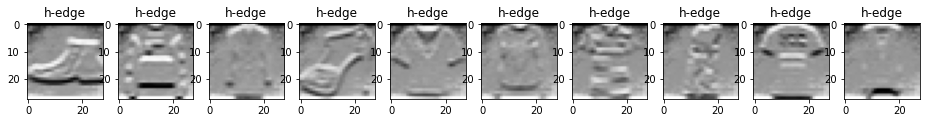

In [139]:
import random
figs,axs=plt.subplots(1,10,figsize=(16,12))
for i in range(10):
    rand=random.choice(range(x_train.shape[0]))
    x=display_fashion(x_train_conv[rand],"h-edge",axs[i])
figs.show()

<p style="color:blue"><b>dimensionality reduction using max-pooling</b></p>

<p style="color:red"><b>max pooling</b></p>

In [140]:
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler

In [144]:
def maxpool(x,size=(2,2)):
    w=int(np.sqrt(x.shape[1]))
    x=np.array([block_reduce(img.reshape((w, w)), block_size=(size[0],size[1]), func=np.max) for img in x])
    x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
    return MinMaxScaler().fit_transform(x)

In [153]:
x_train_maxpool=maxpool(x_train_conv,size=(2,2))
x_test_maxpool=maxpool(x_test_conv,size=(5,5))

<ipython-input-154-72624d6f4b65>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs.show()


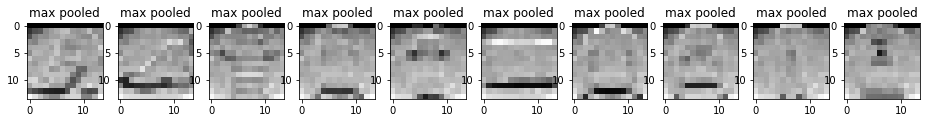

In [154]:
figs,axs=plt.subplots(1,10,figsize=(16,12))
import random
for i in range(10):
    rand=random.choice(range(x_train.shape[0]))
    display_fashion(x_train_maxpool[rand], "max pooled",axs[i])
figs.show()

<ipython-input-156-288bcb5b9f81>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs.show()


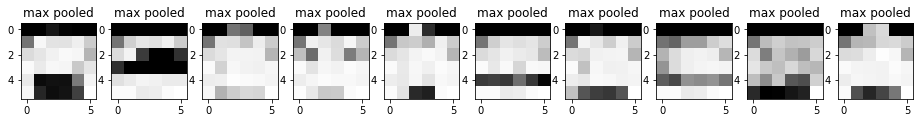

In [156]:
figs,axs=plt.subplots(1,10,figsize=(16,12))
import random
for i in range(10):
    rand=random.choice(range(x_test.shape[0]))
    display_fashion(x_test_maxpool[rand], "max pooled",axs[i])
figs.show()

<p style="color:blue"><b>putting it altogether</b></p>
<p>important for advanced work. you can think of it as a scikit transformer that will convolve over images and max pool out of these convolutions each with it's specific kernels</p>

In [188]:
def maxpool(x,size=(2,2)):
    w=int(np.sqrt(x.shape[1]))
    x=np.array([block_reduce(img.reshape((w, w)), block_size=(size[0],size[1]), func=np.max) for img in x])
    x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
    return MinMaxScaler().fit_transform(x)

In [182]:
class ConvolutionTransformer:
    def __init__(self,kernel=[],max_pool=False,max_pool_size=(2,2)):
        self.kernel=kernel
        self.max_pool=max_pool
        self.max_pool_size=max_pool_size
    def fit(self,x):
        return x
    def transform(self,x,y=None):
        x=convolve(x,self.kernel)
        if self.max_pool:
            x=maxpool(x,self.max_pool_size)
        return x
    def fit_transform(self,x,y=None):
        x=self.fit(x)
        return self.transform(x)
            

In [183]:
kernels = [
('Sharpen', [[0,-1,0], [-1,5,-1], [0,-1,0]]),
('V-Edge', [[-1,0,1], [-2,0,2], [-1,0,1]]),
('H-Edge', [[-1,-2,-1], [0,0,0], [1,2,1]]),
]

In [184]:
type(kernels)

list

In [185]:
from sklearn.pipeline import FeatureUnion

In [186]:
funion=FeatureUnion(
    [
        (kernel[0],ConvolutionTransformer(kernel[1],max_pool=True,max_pool_size=(2,2))) for kernel in kernels
    ]
)

In [187]:
x_train_conv=funion.fit_transform(x_train)
x_test_conv=funion.fit_transform(x_test)

In [189]:
x_train_conv.shape

(8000, 588)

<b>showing the image can't be done because now it has 588 features after convolving with 3 filters</b>

ValueError: cannot reshape array of size 588 into shape (24,24)

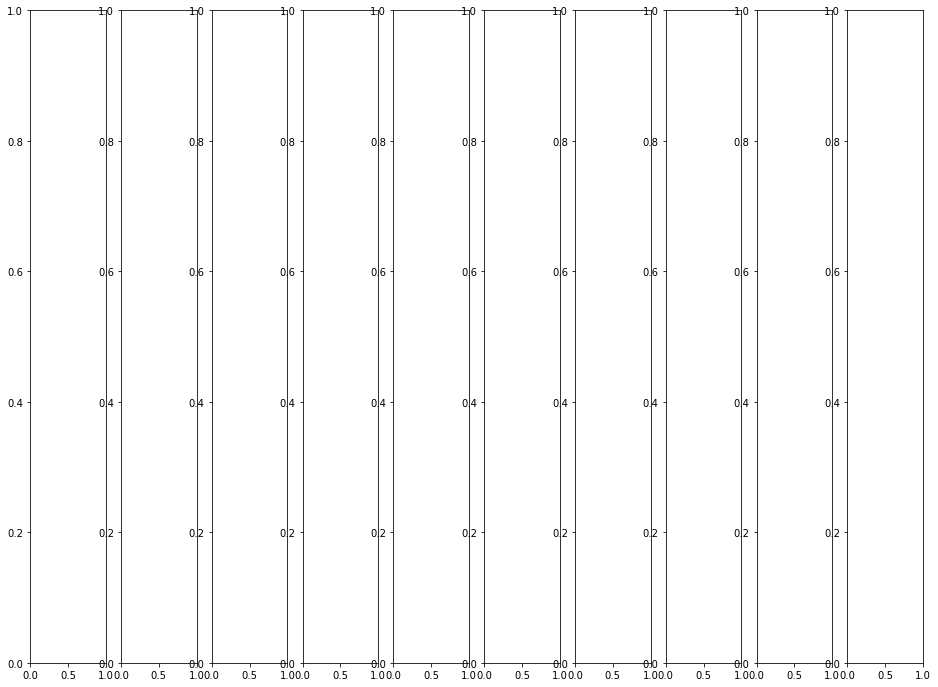

In [191]:
figs,axs=plt.subplots(1,10,figsize=(16,12))
for i in range(10):
    rand=random.choice(range(len(x_train)))
    display_fashion(x_train_conv[rand],"funion transformer",axs[i])

<b>fitting the data</b>

In [192]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(
    hidden_layer_sizes=(500, 300),
    activation='relu',
    learning_rate_init=0.01,
    solver='adam',
    max_iter=80,
    batch_size=50,
    early_stopping=True,
)

In [194]:
mlp.fit(x_train_conv, y_train)

MLPClassifier(batch_size=50, early_stopping=True, hidden_layer_sizes=(500, 300),
              learning_rate_init=0.01, max_iter=80)

In [196]:
y_test_predict = mlp.predict(x_test_conv)

In [200]:
y_test_predict

array(['6', '1', '7', ..., '5', '9', '4'], dtype='<U1')

In [201]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1_score(y_test.astype(int),y_test_predict.astype(int),average='micro')

0.8235